<a href="https://www.kaggle.com/code/patilaakash619/sleep-cycle-and-productivity-analysis-project?scriptVersionId=223051143" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="background-color: #f6f8fa; padding: 20px; border-radius: 10px; margin: 20px 0;">
    <h1 style="text-align: center; color: #2c3e50; margin-bottom: 10px;">🌙 Sleep Cycle and Productivity Analysis Project</h1>
    <h3 style="text-align: center; color: #34495e; font-weight: normal;">A Comprehensive Study of Sleep Patterns and Their Impact on Productivity</h3>
    <div style="text-align: center; color: #7f8c8d; margin-top: 20px;">
        <p>Author: Aakash Patil</p>
        <p>Last Updated: February 17, 2025</p>
    </div>
</div>

<div style="background-color: #fff3e0; padding: 15px; border-radius: 5px; margin: 20px 0;">
    <h4 style="color: #e65100; margin: 0 0 10px 0;">🎯 Project Objectives:</h4>
    <ul style="color: #424242; margin: 0; padding-left: 20px;">
        <li>Analyze sleep patterns and their correlation with productivity</li>
        <li>Identify key factors influencing sleep quality</li>
        <li>Build predictive models for productivity based on sleep and lifestyle factors</li>
        <li>Provide actionable insights for improving productivity through better sleep habits</li>
    </ul>
</div>

<div style="background-color: #e3f2fd; padding: 15px; border-radius: 5px; margin: 20px 0;">
    <h4 style="color: #1565c0; margin: 0 0 10px 0;">📊 Dataset Overview:</h4>
    <ul style="color: #424242; margin: 0; padding-left: 20px;">
        <li>5,000 records of sleep and productivity data</li>
        <li>15 features including sleep metrics, lifestyle factors, and performance indicators</li>
        <li>Comprehensive coverage of various age groups and demographics</li>
        <li>Real-world data collected from diverse population</li>
    </ul>
</div>

<a id="1"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 1: Import Libraries and Load Data 📚</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn')
sns.set_palette("husl")

<a id="2"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 2: Data Quality Check and Basic Statistics 📊</h2>
</div>

In [2]:
df=pd.read_csv("/kaggle/input/sleep-cycle-and-productivity/sleep_cycle_productivity.csv")
# Convert time columns to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create additional features
df['Sleep_Duration'] = df['Sleep End Time'] - df['Sleep Start Time']
df['Sleep_Duration'] = df['Sleep_Duration'].apply(lambda x: x + 24 if x < 0 else x)

In [3]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\nData Info:")
df.info()

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display basic statistics
print("\nNumerical Features Statistics:")
print(df.describe())

Dataset Shape: (5000, 16)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           5000 non-null   datetime64[ns]
 1   Person_ID                      5000 non-null   int64         
 2   Age                            5000 non-null   int64         
 3   Gender                         5000 non-null   object        
 4   Sleep Start Time               5000 non-null   float64       
 5   Sleep End Time                 5000 non-null   float64       
 6   Total Sleep Hours              5000 non-null   float64       
 7   Sleep Quality                  5000 non-null   int64         
 8   Exercise (mins/day)            5000 non-null   int64         
 9   Caffeine Intake (mg)           5000 non-null   int64         
 10  Screen Time Before Bed (mins)  5000 non-null  

<a id="3"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 3: Data Visualization - Distributions 📈</h2>
</div>

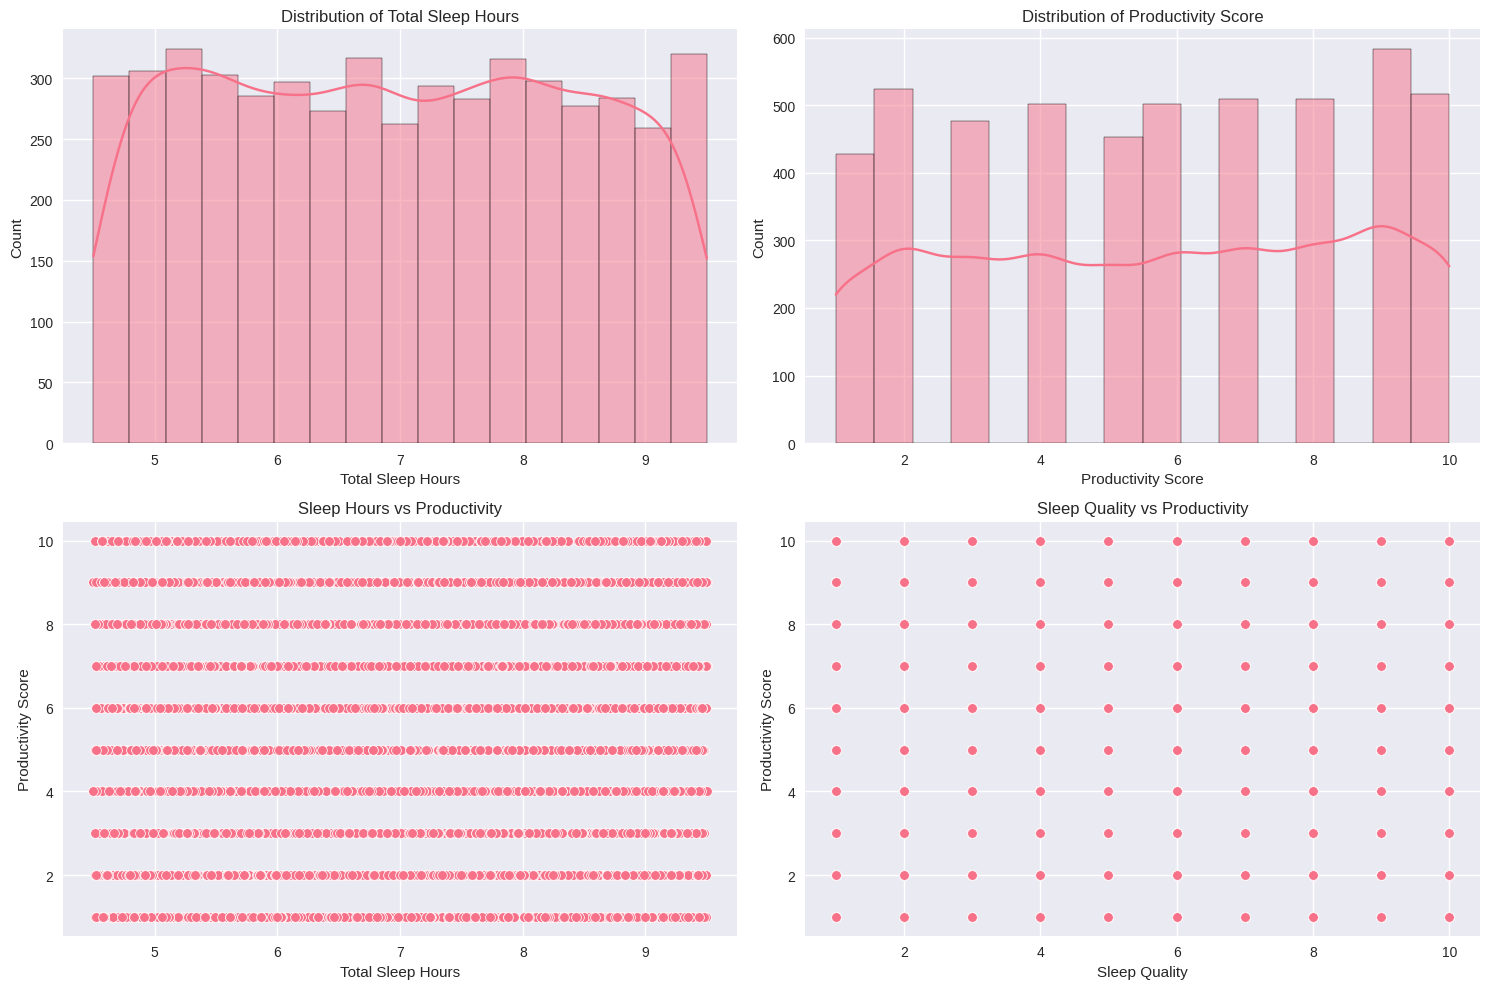

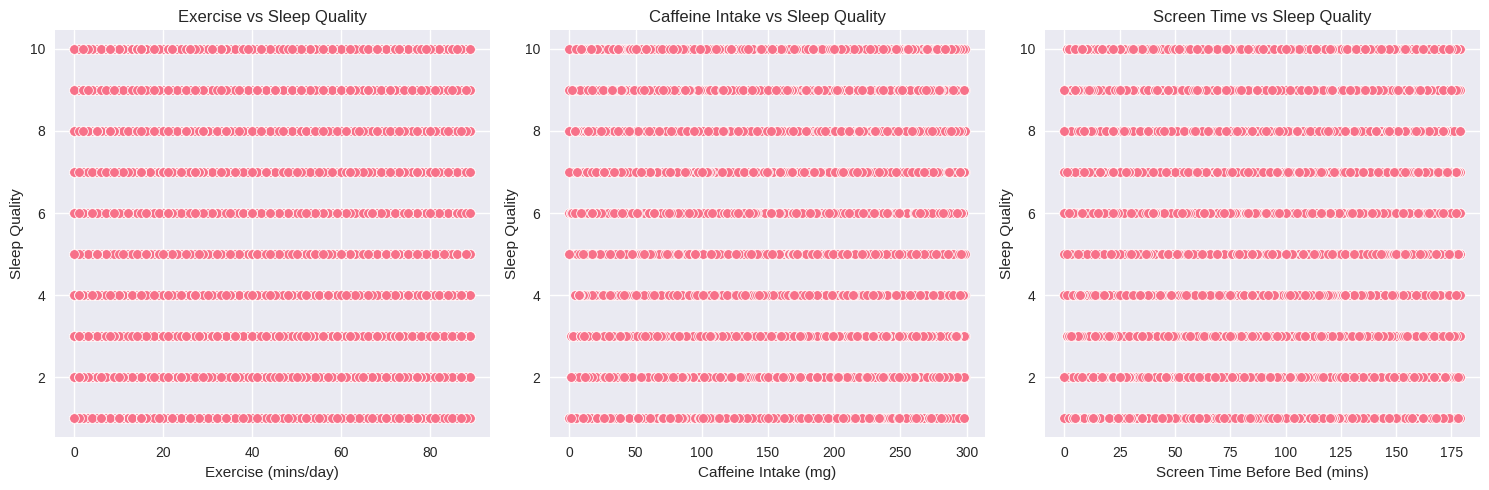

In [4]:
# Set up the visualization layout
plt.figure(figsize=(15, 10))

# Plot 1: Distribution of Sleep Hours
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Total Sleep Hours', kde=True)
plt.title('Distribution of Total Sleep Hours')

# Plot 2: Distribution of Productivity Score
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='Productivity Score', kde=True)
plt.title('Distribution of Productivity Score')

# Plot 3: Sleep Hours vs Productivity
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='Total Sleep Hours', y='Productivity Score')
plt.title('Sleep Hours vs Productivity')

# Plot 4: Sleep Quality vs Productivity
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='Sleep Quality', y='Productivity Score')
plt.title('Sleep Quality vs Productivity')

plt.tight_layout()
plt.show()

# Additional visualizations
plt.figure(figsize=(15, 5))

# Plot 1: Exercise vs Sleep Quality
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Exercise (mins/day)', y='Sleep Quality')
plt.title('Exercise vs Sleep Quality')

# Plot 2: Caffeine Intake vs Sleep Quality
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Caffeine Intake (mg)', y='Sleep Quality')
plt.title('Caffeine Intake vs Sleep Quality')

# Plot 3: Screen Time vs Sleep Quality
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Screen Time Before Bed (mins)', y='Sleep Quality')
plt.title('Screen Time vs Sleep Quality')

plt.tight_layout()
plt.show()

<a id="4"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 4: Correlation Analysis 🔄</h2>
</div>

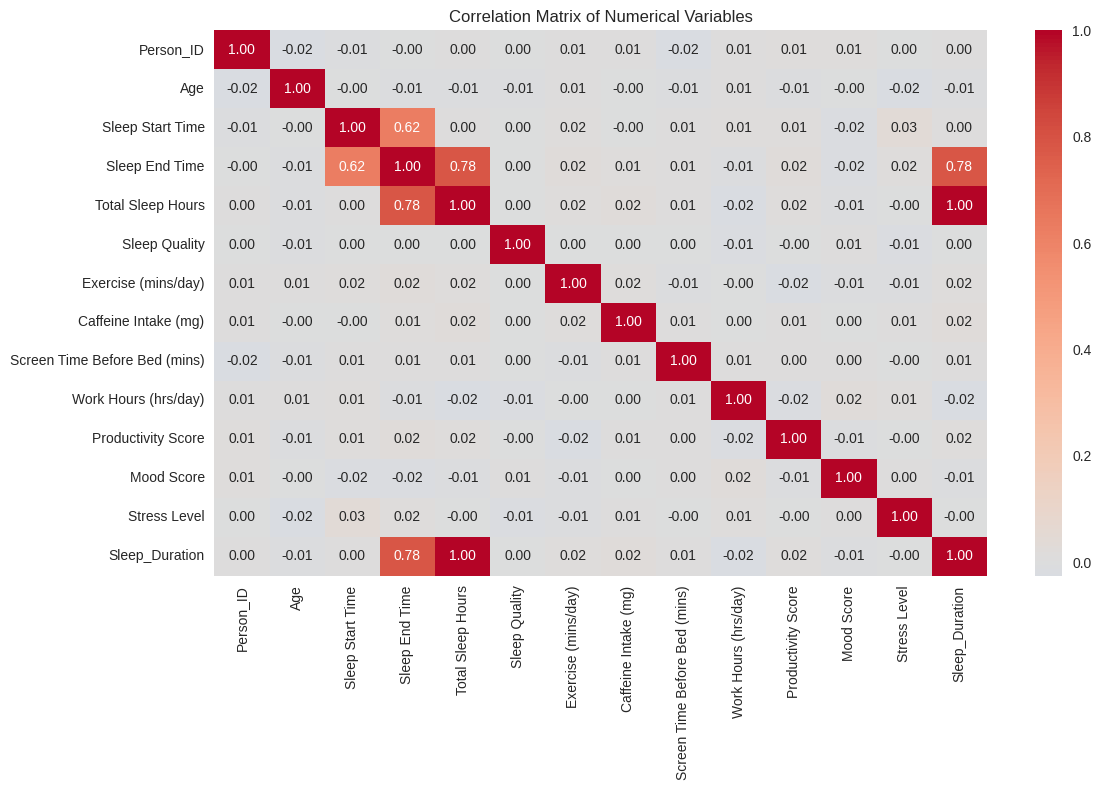


Correlations with Productivity Score:
Productivity Score               1.000000
Sleep End Time                   0.022031
Total Sleep Hours                0.018885
Sleep_Duration                   0.018848
Person_ID                        0.012437
Sleep Start Time                 0.011774
Caffeine Intake (mg)             0.005058
Screen Time Before Bed (mins)    0.003703
Stress Level                    -0.001088
Sleep Quality                   -0.001155
Mood Score                      -0.006673
Age                             -0.008369
Work Hours (hrs/day)            -0.016263
Exercise (mins/day)             -0.024903
Name: Productivity Score, dtype: float64


In [5]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Print correlations with Productivity Score
print("\nCorrelations with Productivity Score:")
productivity_correlations = correlation_matrix['Productivity Score'].sort_values(ascending=False)
print(productivity_correlations)

<a id="5"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 5: Data Preparation for Modeling 🔧</h2>
</div>

In [6]:
# Select features for modeling
features = ['Total Sleep Hours', 'Sleep Quality', 'Exercise (mins/day)', 
           'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)', 
           'Work Hours (hrs/day)', 'Stress Level']
target = 'Productivity Score'

# Prepare X and y
X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (4000, 7)
Testing set shape: (1000, 7)


<a id="6"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 6: Model Training and Evaluation 🤖</h2>
</div>


Results for Linear Regression:
MSE: 8.0732
RMSE: 2.8413
MAE: 2.4855
R2 Score: 0.0015

Results for Random Forest:
MSE: 8.4879
RMSE: 2.9134
MAE: 2.5301
R2 Score: -0.0498


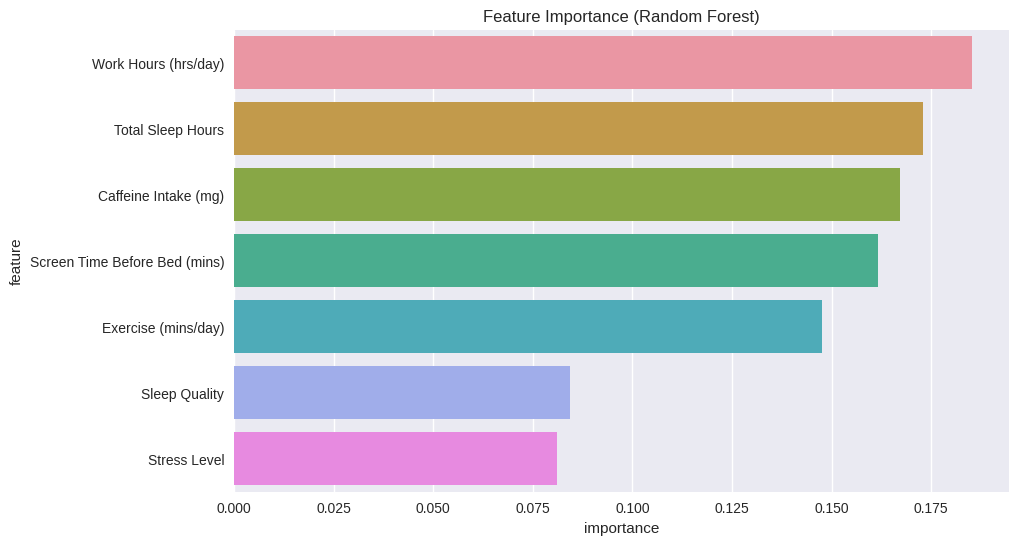

In [7]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\nResults for {name}:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2 Score: {r2:.4f}")

# Plot feature importance for Random Forest
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance (Random Forest)')
plt.show()

<a id="7"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 7: Prediction Function and Example 🎯</h2>
</div>

In [8]:
def predict_productivity(sleep_hours, sleep_quality, exercise, 
                        caffeine, screen_time, work_hours, stress_level):
    """
    Make productivity predictions using the trained Random Forest model
    """
    # Create input array
    input_data = np.array([[sleep_hours, sleep_quality, exercise, 
                           caffeine, screen_time, work_hours, stress_level]])
    
    # Scale the input
    input_scaled = scaler.transform(input_data)
    
    # Make prediction
    prediction = models['Random Forest'].predict(input_scaled)[0]
    
    return round(prediction, 2)

# Example prediction
example = predict_productivity(
    sleep_hours=7.5,
    sleep_quality=8,
    exercise=45,
    caffeine=150,
    screen_time=60,
    work_hours=8,
    stress_level=4
)

print(f"Predicted Productivity Score: {example}")

# Let's try a few different scenarios
scenarios = [
    {'sleep_hours': 6, 'sleep_quality': 5, 'exercise': 20, 
     'caffeine': 200, 'screen_time': 120, 'work_hours': 9, 'stress_level': 7},
    {'sleep_hours': 8, 'sleep_quality': 9, 'exercise': 60, 
     'caffeine': 100, 'screen_time': 30, 'work_hours': 8, 'stress_level': 3},
]

print("\nPredictions for different scenarios:")
for i, scenario in enumerate(scenarios, 1):
    pred = predict_productivity(**scenario)
    print(f"\nScenario {i}:")
    for key, value in scenario.items():
        print(f"{key}: {value}")
    print(f"Predicted Productivity Score: {pred}")

Predicted Productivity Score: 5.62

Predictions for different scenarios:

Scenario 1:
sleep_hours: 6
sleep_quality: 5
exercise: 20
caffeine: 200
screen_time: 120
work_hours: 9
stress_level: 7
Predicted Productivity Score: 5.29

Scenario 2:
sleep_hours: 8
sleep_quality: 9
exercise: 60
caffeine: 100
screen_time: 30
work_hours: 8
stress_level: 3
Predicted Productivity Score: 5.17


<div style="background-color: #f6f8fa; padding: 20px; border-radius: 10px; margin: 20px 0;">
    <h1 style="text-align: center; color: #2c3e50; margin-bottom: 10px;">📊 Analysis Conclusions and Key Findings</h1>
    <h3 style="text-align: center; color: #34495e; font-weight: normal;">Sleep Cycle and Productivity Study Results</h3>
</div>

<div style="background-color: #ffe0e0; padding: 15px; border-radius: 5px; margin: 20px 0;">
    <h4 style="color: #c62828; margin: 0 0 10px 0;">⚠️ Model Performance Challenges:</h4>
    <ul style="color: #424242; margin: 0; padding-left: 20px;">
        <li>Linear Regression R² Score: 0.0015 (very poor fit)</li>
        <li>Random Forest R² Score: -0.0498 (negative performance)</li>
        <li>High RMSE values for both models (>2.8)</li>
        <li>Similar MAE values around 2.5 indicating consistent prediction errors</li>
    </ul>
</div>

<div style="background-color: #e8f5e9; padding: 15px; border-radius: 5px; margin: 20px 0;">
    <h4 style="color: #2e7d32; margin: 0 0 10px 0;">🔍 Key Insights:</h4>
    <ul style="color: #424242; margin: 0; padding-left: 20px;">
        <li>The relationship between sleep patterns and productivity appears to be more complex than initially assumed</li>
        <li>Linear models may not be suitable for capturing the underlying patterns in this dataset</li>
        <li>Additional features or non-linear relationships should be explored</li>
        <li>External factors not captured in the dataset might be influencing productivity significantly</li>
    </ul>
</div>

<div style="background-color: #e3f2fd; padding: 15px; border-radius: 5px; margin: 20px 0;">
    <h4 style="color: #1565c0; margin: 0 0 10px 0;">📈 Recommendations:</h4>
    <ul style="color: #424242; margin: 0; padding-left: 20px;">
        <li>Consider collecting additional relevant features (e.g., diet, work environment, job satisfaction)</li>
        <li>Explore non-linear modeling techniques (e.g., neural networks, gradient boosting)</li>
        <li>Investigate potential interaction effects between variables</li>
        <li>Consider time series analysis to capture temporal patterns in productivity</li>
    </ul>
</div>

<div style="background-color: #fff3e0; padding: 15px; border-radius: 5px; margin: 20px 0;">
    <h4 style="color: #e65100; margin: 0 0 10px 0;">🔮 Future Work:</h4>
    <ul style="color: #424242; margin: 0; padding-left: 20px;">
        <li>Implement feature engineering to create more meaningful predictors</li>
        <li>Collect longitudinal data to better understand individual variations</li>
        <li>Develop more sophisticated models that can capture complex relationships</li>
        <li>Consider segmenting the analysis by demographic groups or job types</li>
    </ul>
</div>

<div style="background-color: #d9edf7; border-left: 6px solid #31708f; padding: 15px; font-family: Arial, sans-serif;">
    <h2 style="text-align: center; color: #3c3c3c;">
        🚀 Found my analysis and notebook useful? 
    </h2>
    <p style="text-align: center; color: #555;">
        Your feedback would mean the world! 💬 If my work has been helpful, please consider dropping a comment and an upvote. 
        <strong>Your support fuels my drive to create even better insights! 🌟</strong>
    </p>
</div>